In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import torch

In [13]:
results = torch.load('results-global_nn.pth')

In [3]:
results.keys()

dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

# Scatter plot of targets
This section is just to see how distributed our targets are in the robot's space. I think technically (as of writing May 27,2020) the way I generate targets is biased. The only point of this is to see the spread of target generation

In [14]:
train_data = np.load('neural_uvs.npy', allow_pickle=True).item()

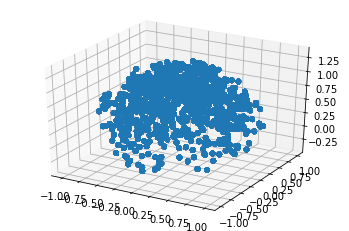

In [15]:
states = train_data['S']
targets = []
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

#local linear stores angles + position, not targets
for v in states:#results.items():
    target = v[-3:]
    if np.linalg.norm(target) >= 0.5:
        targets.append(target)
targets = np.array(targets).T
ax.scatter(targets[0], targets[1], targets[2])    


# Plot Error Curves
In this section we want to see if our Jacobian estimates with our neural network actually solve the undlerying task of interest (i.e. moving the end effector to some target position)

Text(0, 0.5, 'mean-squared-error')

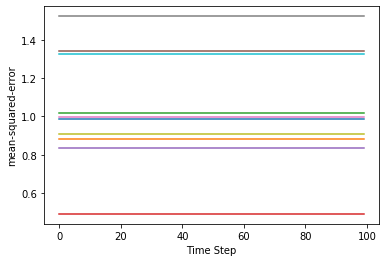

In [8]:
#note that we never use initial state FYI
#Plotting norm of difference
err_over_time = []
for k, value in results.items():
    episode_err = []
    for v in value:
        state = v[0]

        psn = state[0:3]
        targ = state[-3:]
        mse = np.linalg.norm(targ - psn, 2)
        episode_err.append(mse)
    err_over_time.append(episode_err)

plt.plot(np.array(err_over_time).T)
plt.xlabel("Time Step")
plt.ylabel("mean-squared-error")


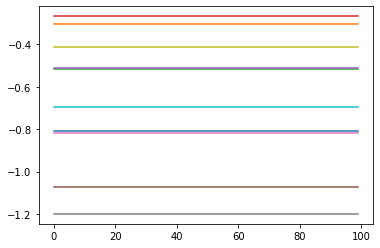

In [9]:
#note that we never use initial state FYI
#Plot Specific Dimension
dim = 2
err_over_time = []
for k, value in results.items():
    episode_err = []
    for v in value:
        state = v[0]

        psn = state[dim]
        targ = state[-3 + dim]
        mse = targ - psn
        episode_err.append(mse)
    err_over_time.append(episode_err)

plt.plot(np.array(err_over_time).T)

# Comparing Jacobians

Here, we just calaculate the difference between Jacobians in trajectories to see how much they differ from the true underlying Jacobian

[[0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0

 [0. 0. 0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0. 0. 0.]
 [

[[0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0

 [0. 0. 0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0. 0. 0.]
 [

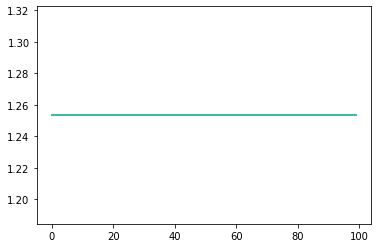

In [12]:
def normalize_rows(x):
    #borrowed from website....
    
    return x / np.linalg.norm(x, ord=2, axis=1, keepdims=True)

err_over_time = []
for k, value in results.items():
    episode_err = []
    for v in value:
        estimate_J = v[-2] 
        #estimate_J = normalize_rows(estimate_J)
        
        true_J = v[-1]
        #true_J = normalize_rows(true_J)
    
        mse = np.linalg.norm(estimate_J - true_J, 'fro')
        episode_err.append(mse)
    err_over_time.append(episode_err)
print(np.array(err_over_time).shape)
print(np.array(err_over_time).mean())
print(np.array(err_over_time).std())
plt.plot(np.array(err_over_time).T)


Text(0, 0.5, 'Frobenius Norm difference of True vs approximate J')

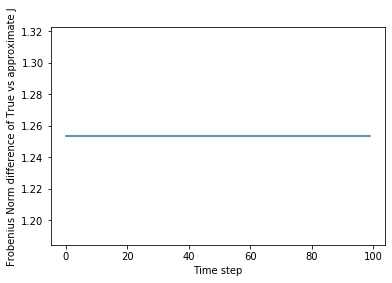

In [25]:
#Just approximating 
err_over_time = []
for k, value in results.items():
    episode_err = []
    for v in value:
        estimate_J = v[-2] 
        #estimate_J = normalize_rows(estimate_J)
        
        true_J = v[-1]
        #true_J = normalize_rows(true_J)
    
        mse = np.linalg.norm(estimate_J - true_J, 'fro')
        episode_err.append(mse)
    err_over_time.append(episode_err)

mean = np.array(err_over_time).mean(axis=0)
std = np.array(err_over_time).std(axis=0)
plt.plot(mean)
plt.fill_between(list(range(100)), mean + std, mean - std, alpha=0.1)
plt.xlabel("Time step")
plt.ylabel("Frobenius Norm difference of True vs approximate J")

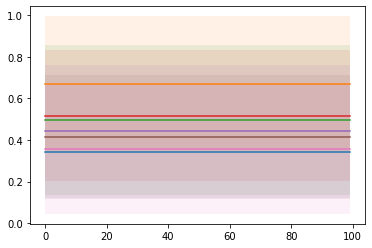

In [27]:
# look at each column 
err_over_time = []
for i in range(7):
    for k, value in results.items():
        episode_err = []
        for v in value:
            estimate_J = v[-2][:,i] 
            #estimate_J = normalize_rows(estimate_J)

            true_J = v[-1][:,i]
            #true_J = normalize_rows(true_J)

            mse = np.linalg.norm(estimate_J - true_J, )
            episode_err.append(mse)
        err_over_time.append(episode_err)

    mean = np.array(err_over_time).mean(axis=0)
    std = np.array(err_over_time).std(axis=0)
    plt.plot(mean)
    plt.fill_between(list(range(100)), mean + std, mean - std, alpha=0.1)
plt.show()

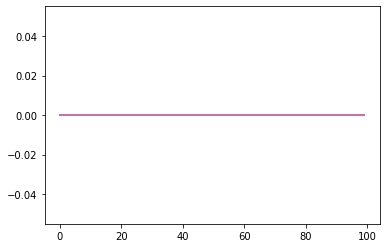

In [28]:
# Look at determinant of inv(J) * J
err_over_time = []
for i in range(7):
    for k, value in results.items():
        episode_err = []
        for v in value:
            estimate_J = v[-2] 
            #estimate_J = normalize_rows(estimate_J)
            est_Ji = np.linalg.pinv(estimate_J)
            true_J = v[-1]
            
            res = np.matmul(est_Ji, true_J)          
            det = np.linalg.det(res)
            episode_err.append(det)
        err_over_time.append(episode_err)

    mean = np.array(err_over_time).mean(axis=0)
    std = np.array(err_over_time).std(axis=0)
    plt.plot(mean)
    plt.fill_between(list(range(100)), mean + std, mean - std, alpha=0.1)
plt.show()

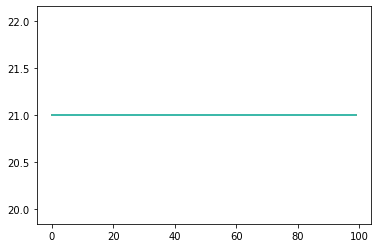

In [30]:

#just consider signs of them
err_over_time = []
for k, value in results.items():
    episode_err = []
    for v in value:
        estimate_J = np.sign(v[-2]) 
        
        
        true_J = np.sign(v[-1])
        
        sign_mismatch = np.logical_not(np.logical_and(estimate_J, true_J))
        loss = (sign_mismatch).sum()
        episode_err.append(loss)
    err_over_time.append(episode_err)
    
plt.plot(np.array(err_over_time).T)